# Data Analysis
Wine Reviews scraped from wine-mag.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import textwrap

plt.rcParams["figure.figsize"]=10,6

## Load data

In [2]:
df = pd.read_pickle("data/data.pkl")
cols = df.columns
print(cols.values)

['points' 'variety' 'price' 'region_1' 'country' 'title' 'region_2'
 'designation' 'province' 'description' 'winery']


In [3]:
print("There are " + str(len(df)) + " unique reviews, with " +
        str(len(df['title'].unique())) + " unique titles.")

There are 186544 unique reviews, with 171498 unique titles.


## Basic Analysis

In [4]:
na_title = df.loc[df["title"].isna()]
na_price = df.loc[df["price"].isna()]
na_variety = df.loc[df["variety"].isna()]
na_province = df.loc[df["province"].isna()]
na_country = df.loc[df["country"].isna()]
na_points = df.loc[df["points"].isna()]
na_designation = df.loc[df["designation"].isna()]

In [5]:
mean_price = round(df["price"].mean(skipna=True),3)
sigma_price = round(df["price"].std(skipna=True),3)
max_price = df["price"].max()
min_price = df["price"].min()

mean_points = round(df["points"].mean(skipna=True),3)
sigma_points = round(df["points"].std(skipna=True),3)
max_points = df["points"].max()
min_points = df["points"].min()

In [6]:
analysis = pd.DataFrame({
    'Unique Values': [len(df['title'].unique()), len(df['price'].unique()), len(df['variety'].unique()), len(df['province'].unique()), len(df['country'].unique()), len(df['points'].unique()), len(df['designation'].unique())],
    'NaN Values': [len(na_title), len(na_price), len(na_variety), len(na_province), len(na_country), len(na_points), len(na_designation)],
    'Max': ['N/A', max_price, 'N/A', 'N/A', 'N/A', max_points, 'N/A'],
    'Min': ['N/A', min_price, 'N/A', 'N/A', 'N/A', min_points, 'N/A'],
    'Average': ['N/A', mean_price, 'N/A', 'N/A', 'N/A', mean_points, 'N/A'],
    'Sigma': ['N/A', sigma_price, 'N/A', 'N/A', 'N/A', sigma_points, 'N/A']},
    index=["title", "price", "variety", "province", "country", "points", "designation"])

In [7]:
print(analysis.to_markdown(tablefmt="grid"))

+-------------+-----------------+--------------+--------+-------+-----------+---------+
|             |   Unique Values |   NaN Values | Max    | Min   | Average   | Sigma   |
+=============+=================+==============+========+=======+===========+=========+
| title       |          171498 |            0 | N/A    | N/A   | N/A       | N/A     |
+-------------+-----------------+--------------+--------+-------+-----------+---------+
| price       |             442 |        11987 | 8500.0 | 3.0   | 37.056    | 48.578  |
+-------------+-----------------+--------------+--------+-------+-----------+---------+
| variety     |             856 |            1 | N/A    | N/A   | N/A       | N/A     |
+-------------+-----------------+--------------+--------+-------+-----------+---------+
| province    |             493 |           64 | N/A    | N/A   | N/A       | N/A     |
+-------------+-----------------+--------------+--------+-------+-----------+---------+
| country     |              46 

## Plotting Functions

In [8]:
def plot_counts(xdata, ydata, category):
    plt.title("Distribution of the Category '" + str(category) +"'")
    plt.xlabel(str(category)), plt.ylabel("Count")

    plt.bar([textwrap.fill(label, 10) for label in xdata], ydata)

    plt.xticks(rotation=90)

In [9]:
def plot_dist(data, category):
    plt.title("Distribution of the Category '" + str(category) +"'")
    plt.xlabel(str(category)), plt.ylabel("Density")

    if category=="price":
        ax = sns.distplot(
            data,
            bins=np.logspace(np.log10(data.min()),np.log10(data.max()), 50),
            norm_hist=True
        )
        ax.set_xscale('log')
    else:
        sns.distplot(
            data,
            bins=20,
            fit=norm,
            norm_hist=True,
            kde=False
        )      

    plt.grid(True,'both')

## Counts & Distributions of the Categories

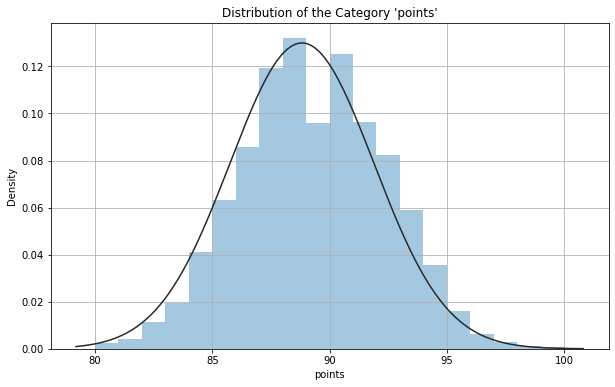

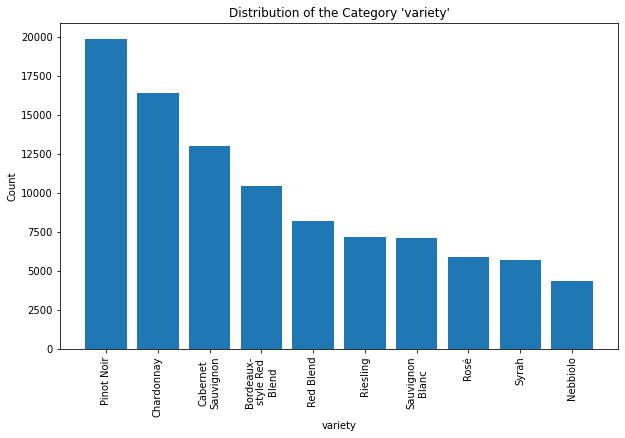

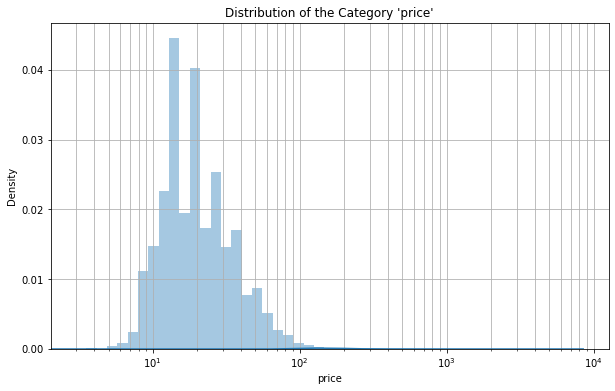

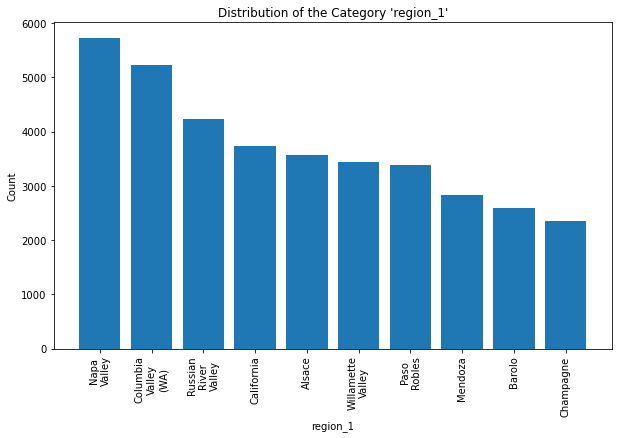

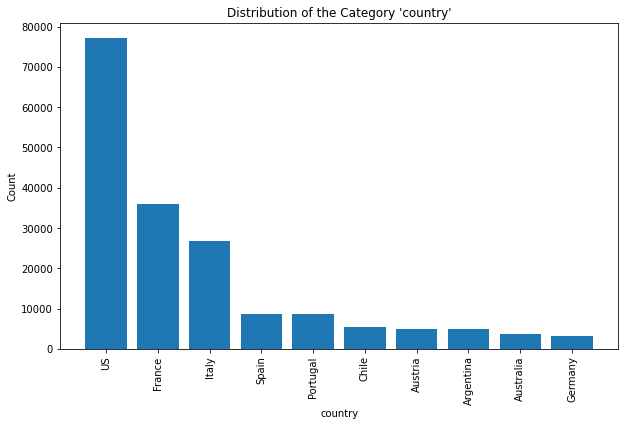

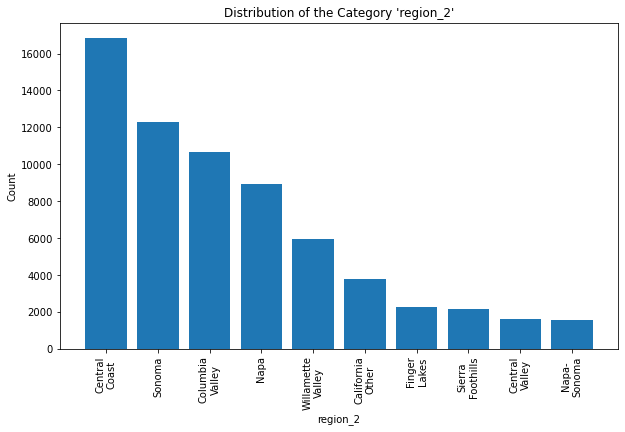

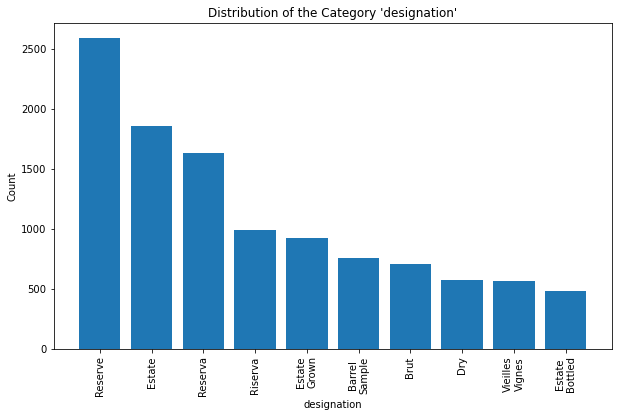

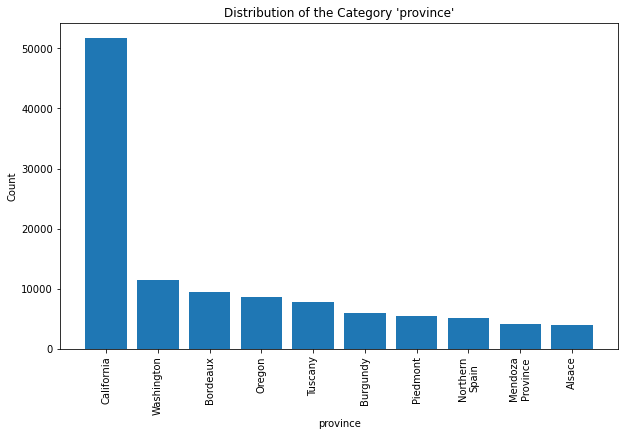

In [10]:
for idx, col in enumerate(cols):
    if col=='description' or col=='title' or col=='winery':
        continue
    elif col=='points' or col=='price':
        plot_dist(df[col].dropna(), col)
        plt.show()
    else:
        top10_counts = Counter(df[col].dropna()).most_common(10)
        xdata = [point[0] for point in top10_counts]
        ydata = [point[1] for point in top10_counts]
        plot_counts(xdata, ydata, col)
        plt.show()

## NaN Values
### Price

In [11]:
print("There are " + str(len(na_price)) + " NaN values for the price out of " + str(len(df)) + " total reviews (" + str(round(100*len(na_price) / len(df), 2)) + "%).")

There are 11987 NaN values for the price out of 186544 total reviews (6.43%).


In [12]:
data_wo_price_na = df.loc[df["price"].notnull()]

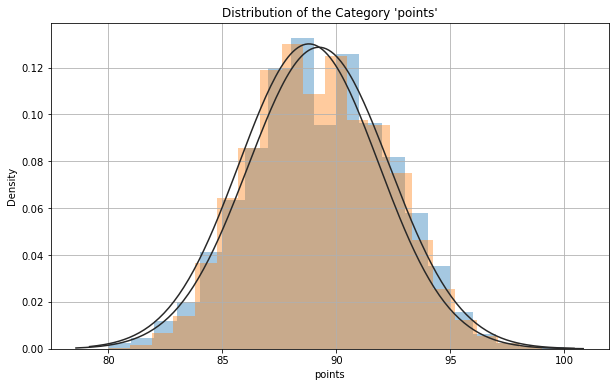

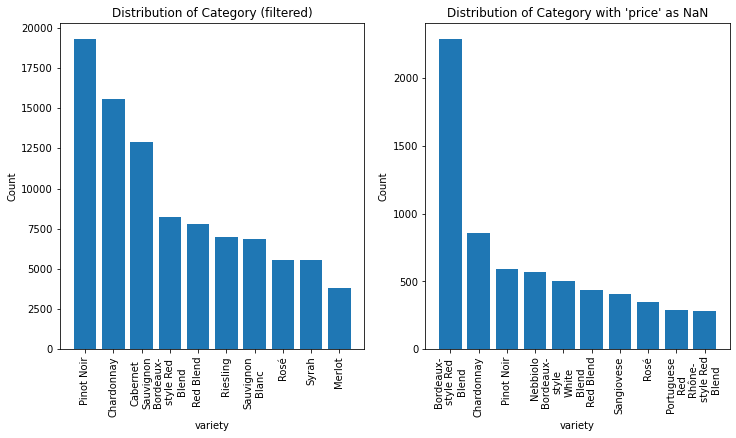

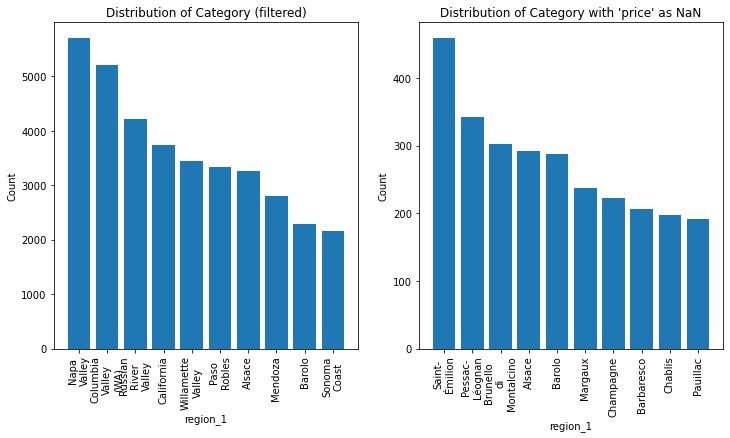

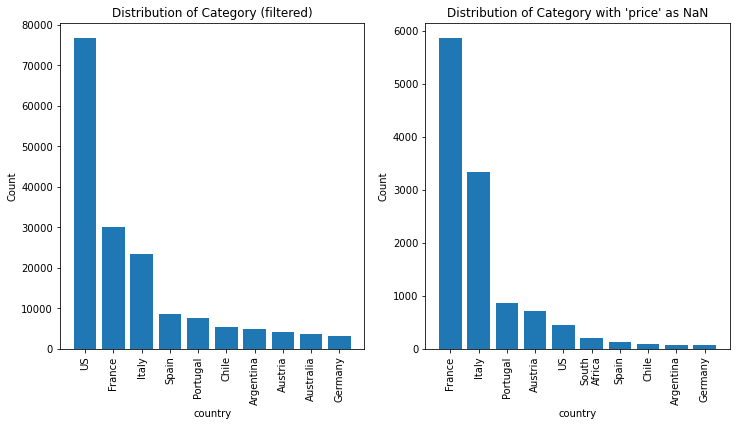

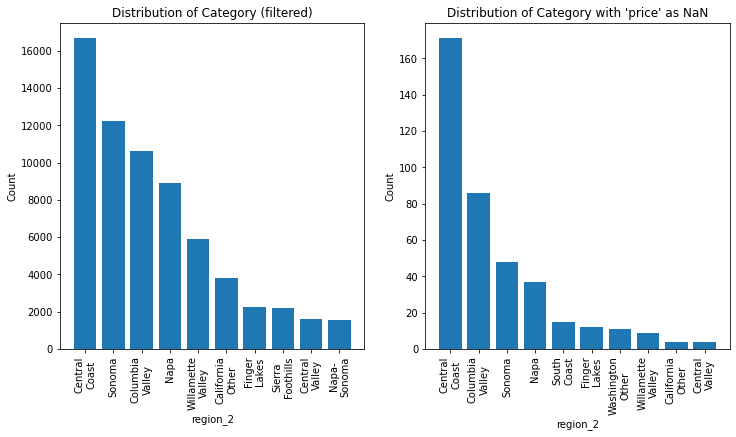

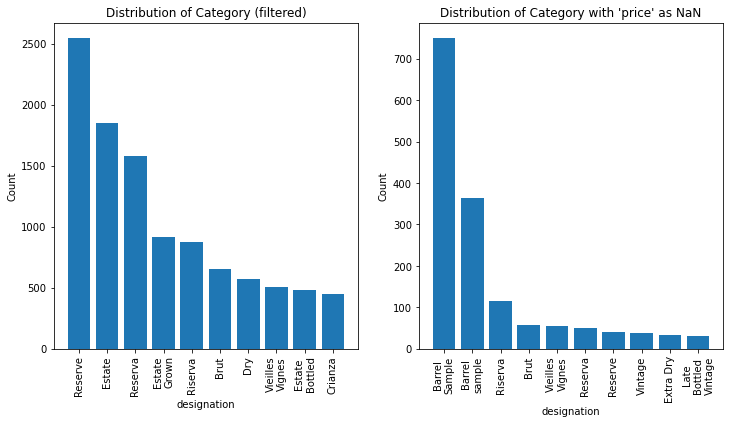

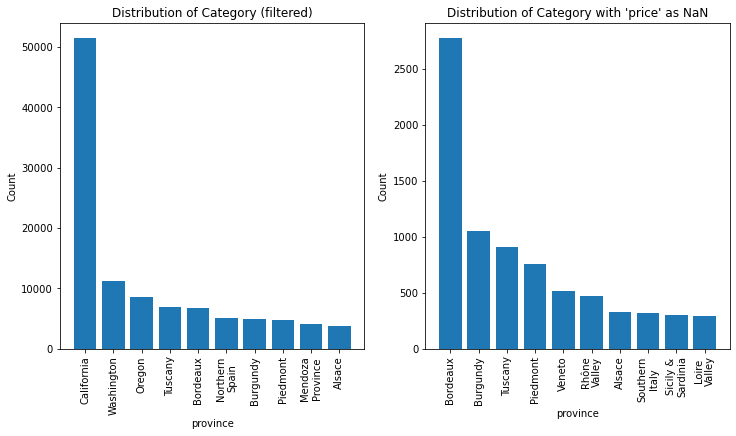

In [13]:
for idx, col in enumerate(cols):
    if col=='description' or col=='title' or col=='winery' or col=='price':
        continue
    elif col=='points':
        data_na = na_price[col].dropna()
        data_notnull = data_wo_price_na[col].dropna()

        # plt.figure(figsize=(12, 6))
        # plt.subplot(121)
        # plot_dist(data_notnull, col)
        # plt.title("Distribution of Category (filtered)")
        # plt.subplot(122)
        # plot_dist(data_na, col)
        # plt.title("Distribution of Category with 'price' as NaN")
        # plt.show()

        plot_dist(data_notnull, col)
        plot_dist(data_na, col)
        plt.show()
    else:
        top10_counts_na = Counter(na_price[col].dropna()).most_common(10)
        xdata_na = [point[0] for point in top10_counts_na]
        ydata_na = [point[1] for point in top10_counts_na]
        top10_counts_wo_price_na = Counter(data_wo_price_na[col].dropna()).most_common(10)
        xdata_wo_price_na = [point[0] for point in top10_counts_wo_price_na]
        ydata_wo_price_na = [point[1] for point in top10_counts_wo_price_na]

        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        plot_counts(xdata_wo_price_na, ydata_wo_price_na, col)
        plt.title("Distribution of Category (filtered)")
        plt.subplot(122)
        plot_counts(xdata_na, ydata_na, col)
        plt.title("Distribution of Category with 'price' as NaN")
        plt.show()